In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Breast.csv')

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,2,1,2,1,1,1
679,2,1,1,1,2,1,3,1,1,1
680,5,10,10,10,4,10,5,6,3,2
681,1,1,1,3,2,1,1,1,1,1


## **Data Analysis**

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


In [5]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
678,3,1,1,1,2,1,2,1,1,1
679,2,1,1,1,2,1,3,1,1,1
680,5,10,10,10,4,10,5,6,3,2
681,1,1,1,3,2,1,1,1,1,1
682,3,1,1,1,3,2,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      683 non-null    int64
 1   V2      683 non-null    int64
 2   V3      683 non-null    int64
 3   V4      683 non-null    int64
 4   V5      683 non-null    int64
 5   V6      683 non-null    int64
 6   V7      683 non-null    int64
 7   V8      683 non-null    int64
 8   V9      683 non-null    int64
 9   Class   683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,1.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,2.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [8]:
df.dtypes

V1       int64
V2       int64
V3       int64
V4       int64
V5       int64
V6       int64
V7       int64
V8       int64
V9       int64
Class    int64
dtype: object

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col,                                    # Feature
                      df[col].dtype,                          # Data_type
                      df[col].isna().sum(),                   # Null_num
                      100*df[col].isna().sum()/len(df[col]),  # Null_pct
                      df[col].unique(),                       # Unique_num
                      df[col].unique()[:4]])                  # Unique_sample
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,V1,int64,0,0.0,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]","[5, 3, 6, 4]"
1,V2,int64,0,0.0,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]","[1, 4, 8, 10]"
2,V3,int64,0,0.0,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]","[1, 4, 8, 10]"
3,V4,int64,0,0.0,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]","[1, 5, 3, 8]"
4,V5,int64,0,0.0,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]","[2, 7, 3, 1]"
5,V6,int64,0,0.0,"[1, 10, 2, 4, 3, 9, 7, 5, 8, 6]","[1, 10, 2, 4]"
6,V7,int64,0,0.0,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]","[3, 9, 1, 2]"
7,V8,int64,0,0.0,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]","[1, 2, 7, 4]"
8,V9,int64,0,0.0,"[1, 5, 4, 2, 3, 7, 10, 8, 6]","[1, 5, 4, 2]"
9,Class,int64,0,0.0,"[1, 2]","[1, 2]"


## **Data Preprocessing**

### Missing Value

In [10]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
Class    0
dtype: int64

In [11]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,2,1,2,1,1,1
679,2,1,1,1,2,1,3,1,1,1
680,5,10,10,10,4,10,5,6,3,2
681,1,1,1,3,2,1,1,1,1,1


### Divide into independent and dependent variables

In [12]:
X = df.iloc[:, :-1]
y = df['Class']

### Analisis Korelasi Fitur

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

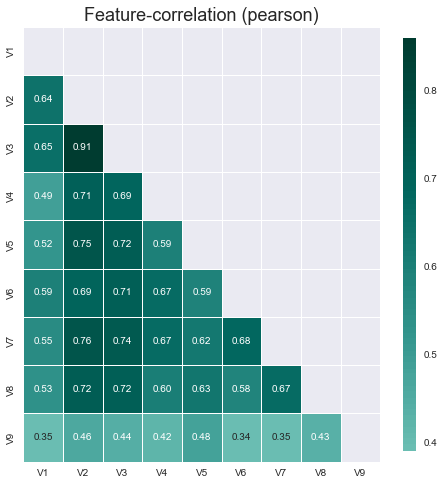

In [13]:
# Korelasi pada data yang belum dilakukan categorical encoding
klib.corr_plot(X, annot=True, figsize=(8,8))

### Outlier Detection

In [14]:
X = X.values
iso = IsolationForest(contamination=0.1)
iso_yhat = iso.fit_predict(X)

In [15]:
mask = iso_yhat != -1
X, y = X[mask, :], y[mask]

### Train Test Split

In [16]:
# Train test split untuk data sebelum outlier detection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train.shape

(491, 9)

## **Modelling - KNN**

Minimum error: 0.04065040650406504 at K = 5


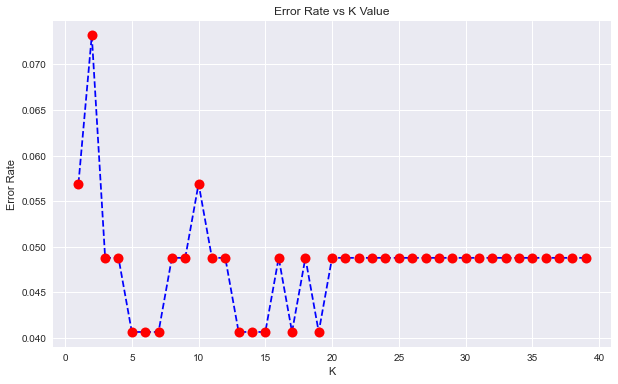

In [18]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f'Minimum error: {min(error_rate)} at K = {error_rate.index(min(error_rate)) + 1}')

In [19]:
k = 5

In [20]:
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
y_pred = knn.predict(X_test)

## **Testing**

In [21]:
print(f'Accuracy of model at K={k} is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model at K=5 is 0.959349593495935


## **Discussion**

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(f'Precision = {precision_score(y_test, y_pred, average=None)}')
print(f'Recall = {recall_score(y_test, y_pred, average=None)}')

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

Precision = [0.95604396 0.96875   ]
Recall = [0.98863636 0.88571429]


In [23]:
target_names = ['1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97        88
           2       0.97      0.89      0.93        35

    accuracy                           0.96       123
   macro avg       0.96      0.94      0.95       123
weighted avg       0.96      0.96      0.96       123



<AxesSubplot:>

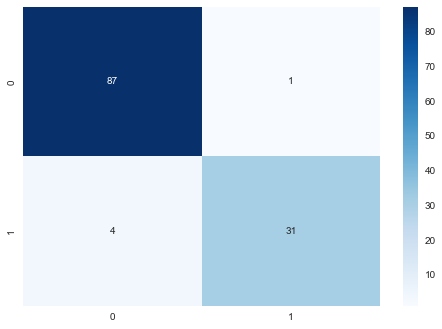

In [24]:
sns.heatmap(cm, annot=True, cmap='Blues')